# O que é uma API?

- É um conjunto de rotinas para acesso a um aplicativo/software/plataforma baseado em Web.
- Acrônimo de __Application Programming Interface - Interface de programação de aplicativos__.
- APIs são importantes quando se tem a inteção de realizar integrações com outros serviços.
- Com as APIs a comunicação de software fica transparente ao usuário.
- APIs podem ser locais, baseada em web e baseada em programas.

# O que é REST?

- É um modelo a ser utilizado para projetar arquiteturas de software baseado em comunicação via rede.
- Acrônimo de **Representational State Transfer (Transferência de Estado Representacional)**.
- Foi definido por Roy Fielding em sua tese de doutorado (PhD) na UC Irvine no ano 2000.
- REST projeta a idéia de que todo recurso deveria responder aos mesmos métodos.   

# O que é REST API?

- É uma API desenvolvida utilizando os princípios da arquitetura REST.
- Um REST API é utilizado na comunicação/integração entre software através de serviços WEB.
- Um REST API é consumido através de requisições HTTP.
- REST APIs são geralmente representadas em seus formatos por JSON e XML. Também são usados páginas HTML, PDF e arquivos de imagens.
- Ao implementar um REST API, cada método deve ser responsável por um tipo diferente de ação. Exemplo: Consulta, Alteração, Inclusão e Exclusão ou (CRUD).

# Métodos do protocolo HTTP

- GET: Método que solicita algum recurso ou objeto do servidor por meio da URI.
- POST: Método usado para envio de arquivo/dados ou formulário HTML para o servidor.
- PUT: Aceitar criar ou modificar um objeto do servidor.
- DELETE: Informa por meio da URI o objeto a ser deletado.


PUT = CREATE <br/>
GET = READ <br/>
POST = UPDATE <br/>
DELETE = DELETE <br/>

# URL x URN vs URI?

- URL: Uniform Resource Locator - Localizador de Recursos Universal.
    - Host que será acessado. Exemplo globallabs.academy.
- URN: Uniform Resource Name - Nome do Recurso Universal.
    - É o recurso que será identificado. Exemplo: category/blog.
- URI: Uniform Resource Identifier - Identificador de Recursos Universal.
    - É o identificador do recurso, podendo ser uma imagem, um arquivo ou uma página. Exemplo: https://globallabs.academy/category/blog/.
- URI une Protocol(https://), URL(globallabs.academy) e URN(/category/blog/).

# XML - Extensible Markup Language

- É uma linguagem de marcação.
- Utilizada para compartilhamento de informações através de requisições HTTP.

# JSON - JavaScript Object Notation

- É um formato de troca de dados entre sistemas independente da linguagem utilizada derivada do JavaScript.
- Muitas linguagens possuem suporte ao JSON.

# Flask

- É um microFrameWork para Python utilizado para desenvolvimento de aplicações WEB.
- É chamado de microFrameWork porque mantém um núcleo simples, mas é estendível.
- Flask não possuí camada de abstração para banco de dados, validação de formulários entre outros, mas é possível estender com outras bibliotecas.
- Por ser leve e simples de usar, Flask é um dos frameworks Python mais usados para desenvolvimento de APIs.

# Agenda

- PIP.
- Instalação do Flask.
- Criando um ambiente virtual (VirtualEnv).
- Primeira aplicação Flask.
- Entendendo os decoladores.
- Postman para realizar requisições HTTP.

# O que utilizaremos?

- Python 3.7.
- Pycharm Community.
- Flask.
- Postman.

# PIP

- Sistema de gerenciamento de pacotes.
- Utilizado para instalar e gerenciar pacotes/bibliotecas em Python.
- Já vem empacotado com Python desde a versão 3.4.<br/>


> <span>></span> <span style="color:yellow">pip</span> <span style="color:white">install Flask</span>

# Virtualenv

- Ferramenta para criar ambientes Python isolados.
- Vem integrado com Python desde a versão 3.3.
- Extremamente útil para se trabalhar com projetos que utilizam bibliotecas com versões diferentes.

> <span style="color:yellow"> python </span><span style="color:gray"> -m </span> <span style="color:white"> venv .\\.virtualenvs\minha_virtualenv </span><br/>
> <span style="color:yellow"> .\\.virtualenvs\minha_virtualenv\Scripts\activate </span><br/>
> <span style="color:green"> (minha_virtualenv) </span> <span style="color:yellow"> pip </span> <span style="color:white"> install Flask </span><br/>

In [ ]:
"""
Meu primeiro app com Flask
"""
from flask import Flask


# Herdando a biblioteca Flask na variável my_app_flask
my_app_flask = Flask(__name__)
# Definindo a rota inicial index.html
@my_app_flask.route("/")
# Definindo a função da index.html

def index():
    """
    Criando a página index.html
    """
    return "Hello World"

if __name__ == "__main__":
    my_app_flask.run()

# Agenda

- Retornando JSON.
- Entendendo tipagem na URI.
- Entendendo métodos.
- Lendo informações de entrada vindo como JSON através da requisição.
- Utilizando Postman para teste da API.
- Utilizando biblioteca Request para teste da API.

In [ ]:
"""
Minha primeira API com flask
"""
from flask import Flask
from flask import jsonify
from flask import request
from flask import json


# Criando uma instância da aplicação Flask
my_app_flask = Flask(__name__)

@my_app_flask.route("/<int:person_id>", methods=['GET'])
def index(person_id):
    """
    Rota: /<int:person_id>
    Método: GET
    Descrição: Retorna informações sobre uma pessoa com o ID especificado.

    Parâmetros:
    - person_id (int): O ID da pessoa.

    Retorno:
    Um objeto JSON contendo as informações da pessoa.
    """
    return jsonify({'id': person_id,
                    'nome': 'Rodrigo',
                    'profissao': 'Desenvolvedor'})


@my_app_flask.route("/soma_get/<int:valor1>/<int:valor2>/", methods=['GET'])
def soma_get(valor1, valor2):
    """
    Rota: /soma_get/<int:valor1>/<int:valor2>/
    Método: GET
    Descrição: Realiza a soma de dois valores passados via URI.

    Parâmetros:
    - valor1 (int): O primeiro valor.
    - valor2 (int): O segundo valor.

    Retorno:
    Um objeto JSON contendo o resultado da soma.
    """
    return jsonify({'soma': valor1 + valor2})


@my_app_flask.route("/soma_post/", methods=['POST', 'PUT'])
def soma_post():
    """
    Rota: /soma_post/
    Métodos: POST, PUT
    Descrição: Realiza a soma de valores passados no corpo da requisição.

    Entrada:
    - Um objeto JSON contendo a lista de valores a serem somados.

    Retorno:
    Um objeto JSON contendo o resultado da soma.
    """
    dados = json.loads(request.data)
    total = sum(dados['valores'])
    return jsonify({'soma': total})


@my_app_flask.route("/soma_post_get/", methods=['POST', 'GET'])
def soma_post_get():
    """
    Rota: /soma_post_get/
    Métodos: POST, GET
    Descrição: Realiza a soma de valores, 
    sendo por POST com dados no corpo ou por GET com valores fixos.

    Entrada (POST):
    - Um objeto JSON contendo a lista de valores a serem somados.

    Retorno:
    Um objeto JSON contendo o resultado da soma.
    """
    if request.method == 'POST':
        dados = json.loads(request.data)
        total = sum(dados['valores'])
    elif request.method == 'GET':
        total = 10 + 10
    return jsonify({'soma': total})


if __name__ == "__main__":
    # Inicia a aplicação em modo de depuração
    my_app_flask.run(debug=True)


# Agenda

- Criando uma lista de registros.
- Implementando métodos GET, POST, PUT e DELETE.
- Manipulando dados com API e métodos implementados.

# Tarefa que realizaremos

- Veremos como implementar uma API para inclusão de novos desenvolvedores e seus conhecimentos.
- Iremos manipular uma lista que irá conter o nome desenvolvedor e suas habilidades (linguagens que domina).
- Tudo isso será feito através de APIs.

In [62]:
"""
Criando uma API com Flask
"""
from flask import Flask
from flask import jsonify
from flask import request
from flask import json


# Criando uma instância da aplicação Flask
my_app_flask = Flask(__name__)

# Criando uma lista para popular o sistema
devs = [
    {'id': 0,
     'nome': 'Rodrigo',
     'habilidades': ['Python', 'Flask']},
    {'id': 1,
     'nome': 'Pâmela',
     'habilidades': ['Python', 'Django']}
]

# Criando uma rota
@my_app_flask.route("/<int:id>/", methods=['GET', 'PUT', 'DELETE'])

# Definindo uma função para minha rota
def index(id):
    """
    Página inicial, index.html
    """
    if request.method == 'GET':
        try:
            response = devs[id]
            habilidades = ', '.join([habilidade for habilidade in response['habilidades']])
        except IndexError:
            response = {'status': 'erro',
                        'mensagem': f'Desenvolvedor de ID {id} não existe!'}
            print(f"Erro de execeção: {IndexError.__name__}")
        except Exception:
            response = {'status': f'erro {Exception.__name__}',
                        'mensagem': 'Procure o Admnistrador do sistema.'}
            print(f"O erro de exeção foi: {Exception.__name__}")
        return (f'ID: {response["id"]}<br/>'
                f'Nome: {response["nome"]}<br/>'
                f'Habilidades: {habilidades}')
    elif request.method == 'PUT':
        dados = json.loads(request.data)
        devs[id] = dados
        return jsonify(dados)
    elif request.method == 'DELETE':
        if 0 <= id < len(devs):  # Certifica-se de que o índice é válido
            devs.pop(id)
            # Após a exclusão, reindexa os desenvolvedores
            for i, dev in enumerate(devs):
                dev['id'] = i
            return jsonify({'status': 'sucesso',
                            'mensagem': 'registro deletado'})
        else:
            return jsonify({'status': 'erro',
                            'mensagem': f'Desenvolvedor de ID {id} não existe!'})

# Listando todos os Devs e incluir um novo Dev
@my_app_flask.route('/', methods=['POST', 'GET'])
def listar_devs():
    if request.method == 'POST':
        dados = json.loads(request.data)
        posicao = len(devs)
        dados['id'] = posicao
        devs.append(dados)
        return jsonify({'status': 'Sucesso',
                        'mensagem': 'Registro inserido!'})
    elif request.method == 'GET':
        desenvolvedores = '<br/><br/>'.join([
            f'ID: {dados["id"]}<br/>'
            f'Nome: {dados["nome"]}<br/>'
            f'Habilidades: {", ".join(dados["habilidades"])}'
            for dados in devs
        ])
        return desenvolvedores
    

# Iniciando o microframework flask
if __name__ == "__main__":
    my_app_flask.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [20/Dec/2023 14:51:50] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2023 14:51:55] "GET / HTTP/1.1" 200 -


# Exercício proposto como desafio:

- Desenvolva uma API que gerencie um cadastro de tarefas.
- A API terá uma lista de tarefas que deverá ter os seguintes campos: id, responsável, tarefa e status.
- A API deverá permitir listar todas as tarefas e também incluir novas tarefas.
- A API deverá permitir consultar uma tarefa através do ID, alterar o status de uma tarefa e também excluir uma tarefa.
- Nenhuma outra alteração deverá ser permitida além do status da tarefa.

# Dica

- Abaixo como ficará o início do cadastro de tarefas e como realizar a alteração de um status.
- O método POST deverá receber o ID e o Status e assim realizar a alteração apenas do Status e não de todo o dicionário.

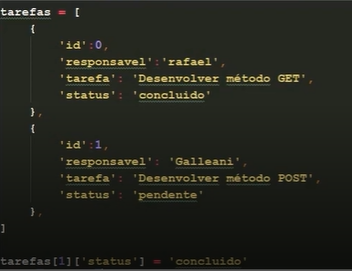

In [3]:
"""
Criando uma API com Flask
"""
from flask import Flask
from flask import jsonify
from flask import request
from flask import json


# Criando uma instância da aplicação Flask
my_app_flask = Flask(__name__)

# Criando uma lista para popular o sistema
tarefas = [
    {
        'id': 0,
        'responsavel': 'rafael',
        'tarefa': 'Desenvolver método GET',
        'status': 'concluído'
    },
    {
        'id': 1,
        'responsavel': 'Galleani',
        'tarefa': 'Desenvolver método POST',
        'status': 'pendente'
    },
]

# Criando uma rota e definindo uma função para minha rota
@my_app_flask.route("/<int:param_id>/", methods=['GET', 'PUT', 'DELETE'])
def index(param_id) -> str | None:
    """
    Rota para operações CRUD em tarefas específicas.

    Args:
        param_id (int): O ID da tarefa.

    Returns:
        str: Detalhes da tarefa.
    """
    if request.method == 'GET':
        try:
            response = tarefas[param_id]
        except IndexError:
            response = {'status': 'erro',
                        'mensagem': f'Tarefa de ID {param_id} não existe!'}
        # except Exception as e:
        #     response = {'status': f'erro {type(e).__name__}',
        #                 'mensagem': 'Procure o Administrador do sistema.'}
        return (
            f'ID: {response["id"]}<br/>'
            f'Responsavel: {response["responsavel"].title()}<br/>'
            f'Tarefa: {response["tarefa"]}<br/>'
            f'Status: {response["status"].title()}'
        )
    if request.method == 'PUT':
        try:
            dados = json.loads(request.data)
            tarefas[param_id]['status'] = dados['status']
        except IndexError:
            dados = {'status': 'erro',
                     'mensagem': f'Tarefa de ID {param_id} não existe!'}
        # except Exception as e:
        #     response = {'status': f'erro {type(e).__name__}',
        #                 'mensagem': 'Procure o Administrador do sistema.'}
        return jsonify(tarefas[param_id])
    if request.method == 'DELETE':
        if 0 <= param_id < len(tarefas):  # Certifica-se de que o índice é válido
            tarefas.pop(param_id)
            # Após a exclusão, reindexa as tarefas
            for i, tasks in enumerate(tarefas):
                tasks['id'] = i
            return jsonify({'status': 'sucesso',
                            'mensagem': 'registro deletado'})
        # Se o id passado no parametro não existir
        return jsonify({'status': 'erro',
                        'mensagem': f'Desenvolvedor de ID {param_id} não existe!'})
    return None


# Listando todas tarefas e incluir um nova tarefa
@my_app_flask.route('/', methods=['POST', 'GET'])
def listar_tarefas() -> str | None:
    """
    Rota para listar todas as tarefas ou inserir uma nova tarefa.

    Returns:
        str: Lista de todas as tarefas ou mensagem de sucesso após a inserção.
    """
    if request.method == 'POST':
        dados = json.loads(request.data)
        posicao = len(tarefas)
        dados['id'] = posicao
        tarefas.append(dados)
        return jsonify({'status': 'Sucesso',
                        'mensagem': 'Registro Inserido!'})
    if request.method == 'GET':
        todas_tarefas = '<br/><br/>'.join([
            f'ID: {dados["id"]}<br/>'
            f'Responsavel: {dados["responsavel"].title()}<br/>'
            f'Tarefa: {dados["tarefa"].title()}<br/>'
            f'Status: {dados["status"].title()}'
            for dados in tarefas
        ])
        return todas_tarefas
    return None


# Iniciando o microframework flask
if __name__ == "__main__":
    my_app_flask.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [21/Dec/2023 11:49:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Dec/2023 11:49:58] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [21/Dec/2023 11:50:29] "GET /0 HTTP/1.1" 308 -
127.0.0.1 - - [21/Dec/2023 11:50:29] "GET /0/ HTTP/1.1" 200 -
127.0.0.1 - - [21/Dec/2023 11:50:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Dec/2023 11:50:48] "GET /1 HTTP/1.1" 308 -
127.0.0.1 - - [21/Dec/2023 11:50:48] "GET /1/ HTTP/1.1" 200 -
127.0.0.1 - - [21/Dec/2023 11:50:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Dec/2023 11:51:01] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [21/Dec/2023 11:51:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Dec/2023 11:51:13] "POST /3 HTTP/1.1" 404 -
127.0.0.1 - - [21/Dec/2023 11:51:21] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [21/Dec/2023 11:51:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Dec/2023 11:51:37] "DELETE /2 HTTP/1.1" 308 -
127.0.0.1 - - [21/Dec/2023 11:51:37] "DELETE /2/ HTTP/1.1" 200 -
127.0.0.1 - -

# Agenda

- O que é RESTFULL?
- A extensão Flask-RESTful.
- Alterando nossa API REST para utilizarmos a extensão Flask-RESTful.

# REST vs RESTful

- REST é um estilo de arquitetônico, um modelo para se seguir ao desenvolver APIs.
- RESTful é um serviço web que utiliza desse paradigma. É utilizado para definir aplicações que implementar webservices que utilizam a arquitetura REST.
- Podemos dizer que uma aplicação web que segue a arquitetura REST, ela é RESTful, ou seja, tem a capacidade de seguir a arquitetura REST.

# Flask-RESTful

- É uma extensão do Flask que adiciona suporte para construção rápida de REST APIs.
- O uso do Flask-RESTful acaba incentivando as práticas recomendadas para a arquitetura REST com uma configuração leva.

```python
from flask import Flask
from flask_restful import Resource
from flask_restful import Api


app = Flask(__name__)
api = Api(app)

class HelloWorld(Resource)
    def get(self):
        return {'hello': 'world'}


api.add_resource(HelloWorld, '/')

if __name__ == '__main__':
    app.run()
```

In [8]:
"""
Minha primeira APIRESTFUL com python
"""
from flask import Flask
from flask_restful import Resource
from flask_restful import Api


# Criando uma lista para popular o sistema
devs = [
    {'id': 0,
     'nome': 'Rodrigo',
     'habilidades': ['Python', 'Flask']},
    {'id': 1,
     'nome': 'Pâmela',
     'habilidades': ['Python', 'Django']}
]

app = Flask(__name__)
api = Api(app)

class Dev(Resource):
    def get(self): # Com Restful não precisamos criar IFs e definir os métodos nos parametros
        return {'nome': 'Rodrigo'}
    def post(self):
        pass
    def put(self):
        pass
    def delete(self):
        pass


api.add_resource(Dev, '/')

if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Dec/2023 08:31:03] "GET / HTTP/1.1" 200 -


127.0.0.1 - - [22/Dec/2023 08:32:03] "GET / HTTP/1.1" 200 -


# Exercício para praticar

- Acrescentar na API de habilidade(módulo habilidades) os métodos PUT, POST e DELETE.
- O método POST deverá inserir uma nova habilidade na lista.
- O método PUT a partir de um ID (identificado da posição) deverá alterar o nome da habilidade que está naquela posição.
- O método DELETE deverá deletar uma habilidade que esteja na posição informado na requisição.
- Incluir validação no app-restful para verificar se habilidades informadas existem na lista já cadastrada.

# SQLAlchemy

- É um ORM para Python.
- Um ORM (Object-relational-mapping) seria a definição de um banco de dados relacional na forma de POO.
- Em ORMs tabelas viram classes e o desenvolvedor não precisa ter conhecimento sql.
- SQLAlchemy fornece um conjunto completo de padrões de persistência, projetados para acesso a banco de dados eficiente e de alto desempenho, adaptando em uma linguagem de domínio Pythonica simples.

# SQLite

- É uma biblioteca de linguagem C que implementa um mecanismo de banco de dados pequeno, rápido e autônomo.

- É o mecanismo de banco de dados mais usado no mundo.

- Ele é incorporado em smartphones por exemplo.

- Com o SQLite é possível montar uma instância de banco de dados sem precisar realizar uma instalação de um banco.

- É muito prático para ambientes de desenvolvimento.

In [1]:
"""
api_atividades (Arquivo: models.py)
"""
from sqlalchemy import create_engine
from sqlalchemy import Column
from sqlalchemy import Integer
from sqlalchemy import String
from sqlalchemy import ForeignKey
from sqlalchemy.orm import scoped_session
from sqlalchemy.orm import relationship
from sqlalchemy.orm import sessionmaker
from sqlalchemy.orm import declarative_base


# Criando o banco de dados
engine = create_engine('sqlite:///atividades.db')
db_session = scoped_session(sessionmaker(autocommit=False,
                                         bind=engine))
Base = declarative_base()
Base.query = db_session.query_property()
# Final da criação do banco de dados

# Criando as tabelas
class Pessoas(Base):
    __tablename__ = 'pessoas'
    id = Column(Integer, primary_key=True)
    nome = Column(String(40), index=True)
    idade = Column(Integer)

    def __repr__(self):
        return(
            f'Nome da Tabela: {self.__tablename__}\n'
            f'Id: {self.id}\n'
            f'Nome: {self.nome}\n'
            f'Idade: {self.idade}'
            )

    def save(self):
        db_session.add(self)
        db_session.commit()
    
    def delete(self):
        db_session.delete(self)
        db_session.commit()
        
    
class Atividades(Base):
    __tablename__ = 'atividades'
    id = Column(Integer, primary_key=True)
    nome = Column(String(80))
    pessoa = relationship("Pessoas")
    pessoa_id = Column(Integer, ForeignKey('pessoas.id'))

    def __repr__(self):
        return(
            f'Nome da Tabela: {self.__tablename__}\n'
            f'Id: {self.id}\n'
            f'Nome: {self.nome}\n'
            f'Id Pessoa: {self.pessoa_id}'
            )


# Executando o banco de dados para criar o arquivo atividades.db
def init_db():
    Base.metadata.create_all(bind=engine)


if __name__ == '__main__':
    init_db()

In [5]:
"""
api_atividades (Arquivo: utils.py)
"""
def insere():
    pessoa = Pessoas(nome='Rodrigo', idade=32)
    pessoa.save()
    # print(pessoa)

def consulta(nome_pessoa=None):
    if nome_pessoa == None:
        pessoa = Pessoas.query.all()
        for pessoas in pessoa:
            print(pessoas, end='\n\n')
    else:
        pessoa = Pessoas.query.filter_by(nome=nome_pessoa).first()
        print(pessoa)

def alterar_nome_pessoa(nome_atualizado=None, nome_anterior=None):
    if nome_anterior == None:
        print("Necessário informar o nome_anterior para poder realizar a modificação!!!")
    else:
        if nome_atualizado == None:
            print("Nenhum registro foi alterado por falta de parâmetros")
        else:
            pessoa = Pessoas.query.filter_by(nome=nome_anterior).first() # Filtro
            pessoa.nome = nome_atualizado # Add
            pessoa.save() # Commit
            print(f"O nome antigo era: {nome_anterior} foi alterado para: {nome_atualizado}")

def deleta_pessoa(id=None, nome=None):
    if id == None and nome == None:
        print("Necessário informar o id ou nome!!!")
    elif id != None:
        pessoa = Pessoas.query.filter_by(id=id).first() # Filtro
        print(f"O registro: {pessoa} \nfoi deletado com sucesso!!!")
        pessoa.delete()
        
    elif nome != None:
        pessoa = Pessoas.query.filter_by(nome=nome).first() # Filtro
        print(f"O registro: {pessoa} \nfoi deletado com sucesso!!!")
        pessoa.delete()




if __name__ == '__main__':
    # insere()
    print("-="*13)
    consulta() # Todos os registros
    print("-="*13)
    consulta(nome_pessoa="Pamela") # Filtrando o registro
    print("-="*13)
    alterar_nome_pessoa(nome_atualizado=None, nome_anterior="Teste")
    print("-="*13)
    deleta_pessoa()


-=-=-=-=-=-=-=-=-=-=-=-=-=
Nome da Tabela: pessoas
Id: 1
Nome: Pamela
Idade: 32

Nome da Tabela: pessoas
Id: 2
Nome: Rodrigo
Idade: 32

-=-=-=-=-=-=-=-=-=-=-=-=-=
Nome da Tabela: pessoas
Id: 1
Nome: Pamela
Idade: 32
-=-=-=-=-=-=-=-=-=-=-=-=-=
Nenhum registro foi alterado por falta de parâmetros
-=-=-=-=-=-=-=-=-=-=-=-=-=
Necessário informar o id ou nome!!!


# Exercício

- Em um novo diretório crie um banco de dados com três tabelas.
    - Tabela Programador
    - Tabela Habilidade
    - Tabela com um join entre Programador e Habilidade com o nome Programador_Habilidade
    <p>

- A tabela Programador deve conter os campos id, nome, idade, e email.
- A tabela Habilidade deve conter os campos id e nome.
- A tabela Programador_Habilidade deve conter os campos id, programador(FK com programador) e habilidade(FK com habilidade)

# Exercício feito (api_sqlalchemy_exercicio_models.py, api_sqlalchemy_exercicio_utils.py)

# Agenda

- Incluir no projeto anterior um app Flask.
- Elaborar as API para persistência em banco de dados com SQLalchemy.
- Além da persistência em banco de dados, também realizaremos todas as consultas em banco de dados.

# Exercício feito completo (api_sqlalchemy_exercicio_app_restful.py)